# Recurrent Neural Network.

## Google Stock Price Prediction.



### Part-1: Data Preprocessing

#### Importing the libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# Importing the training set.
dataset_train=pd.read_csv('Google_Stock_Price_Train.csv')
dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
5,1/10/2012,313.70,315.72,307.30,621.43,"8,824,000"
6,1/11/2012,310.59,313.52,309.40,624.25,"4,817,800"
7,1/12/2012,314.43,315.26,312.08,627.92,"3,764,400"
8,1/13/2012,311.96,312.30,309.37,623.28,"4,631,800"
9,1/17/2012,314.81,314.81,311.67,626.86,"3,832,800"


In [3]:
dataset_train.shape

(1258, 6)

In [4]:
dataset_train.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [5]:
dataset_train.describe(exclude=None)

,Open,High,Low
count,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409
std,151.904442,153.008811,150.552807
min,279.120000,281.210000,277.220000
25%,404.115000,406.765000,401.765000
50%,537.470000,540.750000,532.990000
75%,654.922500,662.587500,644.800000
max,816.680000,816.680000,805.140000


In [6]:
# Creating a variable to train the RNN.
training_set=dataset_train.iloc[:,1:2]# We need only 'Open' feature for forecasting.
training_set

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04
5,313.70
6,310.59
7,314.43
8,311.96
9,314.81


In [7]:
# To create in form of numpy array.
training_set=dataset_train.iloc[:,1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [8]:
type(training_set)

numpy.ndarray

#### Standard Scaling using 'Normalization'.

- When there is 'Sigmoid' as activation function in the output layer on RNN, its recommended to apply 'Normalization'.

In [9]:
# Applying Normalization using MinMax Scalar Class.

from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler(feature_range=(0,1))

In [10]:
training_set_scaled=sc.fit_transform(training_set)
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [11]:
# Creating a data structure with 60 timesteps and 1 output.
# That is at each time 'T' the RNN is going to look back at the 60 stock prices between 60 days before time T.
# Based on the trends, its capturing previous 60 time steps it predicts the output i.e at time 'T+1'.

# Based on iterations of 10, 20, 30.. time steps ; 60 was better in capturing the trends.
# 60 steps corresponds to previous 60 fiancial days i.e 3 months.(Each financial month is of 20 days.) 

# Creating entities , X_train- inputs, y_train- output for the next financial day.
# Creating empty list.
X_train= []
y_train= []

for i in range(60, 1258): #1258 is last row in our train_set data
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

# Creating a numpy array
X_train,y_train=np.array(X_train), np.array(y_train)

In [12]:
X_df=pd.DataFrame(X_train)
print(X_df.shape)
X_df

(1198, 60)


,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.085814,0.097012,0.094334,0.091562,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,...,0.052143,0.056124,0.058189,0.065407,0.068830,0.072438,0.079935,0.078466,0.080345,0.084977
1,0.097012,0.094334,0.091562,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,0.061426,...,0.056124,0.058189,0.065407,0.068830,0.072438,0.079935,0.078466,0.080345,0.084977,0.086279
2,0.094334,0.091562,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,0.061426,0.074745,...,0.058189,0.065407,0.068830,0.072438,0.079935,0.078466,0.080345,0.084977,0.086279,0.084716
3,0.091562,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,0.061426,0.074745,0.027978,...,0.065407,0.068830,0.072438,0.079935,0.078466,0.080345,0.084977,0.086279,0.084716,0.074541
4,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,0.061426,0.074745,0.027978,0.023793,...,0.068830,0.072438,0.079935,0.078466,0.080345,0.084977,0.086279,0.084716,0.074541,0.078838
5,0.064328,0.058542,0.065686,0.061091,0.066393,0.061426,0.074745,0.027978,0.023793,0.024090,...,0.072438,0.079935,0.078466,0.080345,0.084977,0.086279,0.084716,0.074541,0.078838,0.072383
6,0.058542,0.065686,0.061091,0.066393,0.061426,0.074745,0.027978,0.023793,0.024090,0.015924,...,0.079935,0.078466,0.080345,0.084977,0.086279,0.084716,0.074541,0.078838,0.072383,0.066634
7,0.065686,0.061091,0.066393,0.061426,0.074745,0.027978,0.023793,0.024090,0.015924,0.010789,...,0.078466,0.080345,0.084977,0.086279,0.084716,0.074541,0.078838,0.072383,0.066634,0.063156
8,0.061091,0.066393,0.061426,0.074745,0.027978,0.023793,0.024090,0.015924,0.010789,0.009673,...,0.080345,0.084977,0.086279,0.084716,0.074541,0.078838,0.072383,0.066634,0.063156,0.067825
9,0.066393,0.061426,0.074745,0.027978,0.023793,0.024090,0.015924,0.010789,0.009673,0.016426,...,0.084977,0.086279,0.084716,0.074541,0.078838,0.072383,0.066634,0.063156,0.067825,0.068234


In [13]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [14]:
# Reshaping the data, adding some more dimensionality to previous data structure.
# Here we add the exactly the units, i.e the number of predictors we can predict.
# Reshape is best tool for adding extra dimentions in a numpy.

# Adding 3 Dims.
# In this reshape array we have to give 2 arguments i.e 1st to reshape numpy array and next one is we need to specify the new shape which our numpy array (X_train) to have.

# SYNTEX:
# 3D tensor with shape(batch_size. timesteps.input_dim),(Optional)2D tensors with shape(batch_size. output_dim)
# batch_size: Total observations(1198) i.e X_train
# timesteps:(60) Number of columns i.e X_train.shape[0] is rows of X_train and X_train.shape[1] is columns of X_train.
# No_of_indicators: 1 i.e N0_of_Predictors

X_train=np.reshape(X_train,(X_train.shape[0], X_train.shape[1],1))
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

### Part-2: Building the RNN.

In [15]:
# Importing the Keras libraries and packages.
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [16]:
# Initializing the RNN.
# Regressor is an object of sequential class which represents the sequence of layers and we are predicting the continous value.
regressor=Sequential()

In [17]:
# Adding the 1st LSTM layer and some Dropout regularization.
# To avoid 'Overfitting' we add Dropout regularization.
# Arguments in LSTM:3
 ##1.units:No_of_LSTM cells in LSTM layer
 ## Even if we stack many layers, we want our model to have high dimensionality, hence we add large number of neurons in each LSTM layers(units).
        
 ##2.return_sequences: 'True' because we are building the stacked LSTM which will be having sevseral LSTM layers. when we stop to add further LSTM we can give as 'False'. But default will be 'False'.
 ##3.input_shape: Exact shape of input containing x_train that we created in last step of data preprocessing.
   ## It contains last two dimensions corresponding to time steps & the indicators i.e (X_train.shape[0], X_train.shape[1],1)
 


regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

# 0.2 is 20% of neurons of the LSTM layer will be ignored during the training,i.e during forward propagation and back propagation happening during each iteration of the training.

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [18]:
# Adding 2nd LSTM layer and some Dropouot regularization.
# input_shape is not reqired from thes layers.

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [19]:
# Adding 3rd LSTM layer and some Droupout regulaization.

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [20]:
# Adding 4th LSTM layer and some Droupout regulaization.
# Since we are not adding further LSTM, we have to remove the return_sequences sice its default valuse is 'False'.

regressor.add(LSTM(units=50, return_sequences=False))
regressor.add(Dropout(0.2))

In [21]:
# Adding the Output layer.
regressor.add(Dense(units=1))

In [22]:
# Compiling the RNN
# RMSprop optimizer is usually good choice for RNN. Its advanced stochastic gradient descent optimizer.
# But we use adam optimizer.Since it safe choice because its very powerful in updating the weights.
# loss : Since its Regression, we use MSE
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [23]:
# Fitting the RNN to the training set.

# Arguments: 4
# Both dependent and indepenent variables.
# epochs: No_of _iterations(forward and backward propagations)
# batch_size: batches of observations going into neural network i.e no_of_stock prices for predictions.

regressor.fit(X_train,y_train, epochs=100, batch_size=32)


Epoch 1/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0303
Epoch 2/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0060
Epoch 3/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0057
Epoch 4/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0050
Epoch 5/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0048
Epoch 6/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0050
Epoch 7/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0057
Epoch 8/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0046A: 1s - loss
Epoch 9/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0045
Epoch 10/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0040
Epoch 11/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0041
Epoch 12/100
1198/1198 [==============================] - 7s

### Part-3: Making the Predictions and Visualising the results.

In [24]:
# Getting the real stock price of 2017.
dataset_test=pd.read_csv('Google_Stock_Price_Test.csv')
dataset_test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [25]:
dataset_test.shape

(20, 6)

In [26]:
# Actual test data i.e stock price to be tested.
real_stock_price=dataset_test.iloc[:,1:2].values
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [27]:
# Getting the Predicted stock price of 2017.
# We need 60 previous stock prices of the 60 previous days.
# We need both in training set & test set because we have some of the 60 days from training set because they will be from Dec2016 & we have some of stock prices of test set which are from Jan2017.  
# Hence we do 'Concatenation' of training set & test set.
# If we concatenate test_set with scaled

#1. We need to concatenate two original DataFrames i.e
dataset_total=pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
dataset_total

0       325.25
1       331.27
2       329.83
3       328.34
4       322.04
5       313.70
6       310.59
7       314.43
8       311.96
9       314.81
10      312.14
11      319.30
12      294.16
13      291.91
14      292.07
15      287.68
16      284.92
17      284.32
18      287.95
19      290.41
20      291.38
21      291.34
22      294.23
23      296.39
24      302.44
25      303.18
26      304.87
27      302.81
28      304.11
29      304.63
         ...  
1248    800.40
1249    790.22
1250    796.76
1251    795.84
1252    792.36
1253    790.90
1254    790.68
1255    793.70
1256    783.33
1257    782.75
0       778.81
1       788.36
2       786.08
3       795.26
4       806.40
5       807.86
6       805.00
7       807.14
8       807.48
9       807.08
10      805.81
11      805.12
12      806.91
13      807.25
14      822.30
15      829.62
16      837.81
17      834.71
18      814.66
19      796.86
Name: Open, Length: 1278, dtype: float64

In [28]:
dataset_total.shape

(1278,)

In [29]:
#2. To get inputs, at each time T or at each financial day of Jan2017, we need to get 60 previous stock prices of 60 previous financial days.
# We need 60 previous financial days before the first financial day of 2017(3rd Jan 2017) minus 60. This is lower bounds.
# For upper bounds we need, the last financial day of 2017 i.e 60 previous financial days before this last day of 2017
# Last index of the whole dataset.


inputs= dataset_total[len(dataset_total)-len(dataset_test)-60:].values # .values is to make a numpy array. 
inputs

array([779.  , 779.66, 777.71, 786.66, 783.76, 781.22, 781.65, 779.8 ,
       787.85, 798.24, 803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  ,
       808.35, 795.47, 782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 ,
       779.94, 791.17, 756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37,
       762.61, 772.63, 767.73, 764.26, 760.  , 771.53, 770.07, 757.44,
       744.59, 757.71, 764.73, 761.  , 772.48, 780.  , 785.04, 793.9 ,
       797.4 , 797.34, 800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 ,
       790.68, 793.7 , 783.33, 782.75, 778.81, 788.36, 786.08, 795.26,
       806.4 , 807.86, 805.  , 807.14, 807.48, 807.08, 805.81, 805.12,
       806.91, 807.25, 822.3 , 829.62, 837.81, 834.71, 814.66, 796.86])

In [30]:
# Since we didnt used the pandas iloc method to get above values. Therefore its not shaped in a numpy array form, all inputs in one column
# Hence to avoid the formating problem, the solutions is to use reshape function of numpy,
inputs=inputs.reshape(-1,1)
inputs

array([[779.  ],
       [779.66],
       [777.71],
       [786.66],
       [783.76],
       [781.22],
       [781.65],
       [779.8 ],
       [787.85],
       [798.24],
       [803.3 ],
       [795.  ],
       [804.9 ],
       [816.68],
       [806.34],
       [801.  ],
       [808.35],
       [795.47],
       [782.89],
       [778.2 ],
       [767.25],
       [750.66],
       [774.5 ],
       [783.4 ],
       [779.94],
       [791.17],
       [756.54],
       [755.6 ],
       [746.97],
       [755.2 ],
       [766.92],
       [771.37],
       [762.61],
       [772.63],
       [767.73],
       [764.26],
       [760.  ],
       [771.53],
       [770.07],
       [757.44],
       [744.59],
       [757.71],
       [764.73],
       [761.  ],
       [772.48],
       [780.  ],
       [785.04],
       [793.9 ],
       [797.4 ],
       [797.34],
       [800.4 ],
       [790.22],
       [796.76],
       [795.84],
       [792.36],
       [790.9 ],
       [790.68],
       [793.7 ],
       [783.33

In [31]:
# Scaling the inputs
inputs=sc.fit_transform(inputs)
inputs

array([[0.3691268 ],
       [0.37620682],
       [0.35528856],
       [0.451298  ],
       [0.4201888 ],
       [0.39294143],
       [0.39755417],
       [0.37770865],
       [0.46406351],
       [0.57552027],
       [0.62980047],
       [0.54076378],
       [0.64696417],
       [0.7733319 ],
       [0.6624115 ],
       [0.60512766],
       [0.6839734 ],
       [0.54580562],
       [0.41085604],
       [0.36054495],
       [0.24308088],
       [0.06511478],
       [0.32085389],
       [0.41632697],
       [0.37921047],
       [0.49967818],
       [0.12819138],
       [0.1181077 ],
       [0.025531  ],
       [0.11381678],
       [0.23954087],
       [0.28727741],
       [0.19330616],
       [0.30079382],
       [0.24822999],
       [0.21100622],
       [0.16530787],
       [0.28899378],
       [0.2733319 ],
       [0.13784596],
       [0.        ],
       [0.14074233],
       [0.21604806],
       [0.17603519],
       [0.29918472],
       [0.37985411],
       [0.43391976],
       [0.528

In [32]:
# To obtain the 3D structure, which have in each line 60 previous stock prices that we need to predict the next stock price.
# The input which need to take values of the test set.

X_test=[] 
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
# 60 previous days and for next 20 days we need to predict, because the test set contains only 20 financial days.
# Hence we take 80 as range.

# Make 3D:
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [33]:
# Predictions.These are scaled sctock prices.
predicted_stock_price=regressor.predict(X_test)
predicted_stock_price

array([[0.46887922],
       [0.4371672 ],
       [0.42202672],
       [0.42480326],
       [0.45392555],
       [0.5197799 ],
       [0.59699327],
       [0.64489144],
       [0.66274285],
       [0.66322064],
       [0.65708315],
       [0.64914584],
       [0.64247704],
       [0.6435157 ],
       [0.6516807 ],
       [0.69790214],
       [0.7805927 ],
       [0.8769999 ],
       [0.9309705 ],
       [0.88993406]], dtype=float32)

In [34]:
# Inversing the scaling of our Predictions. Because our regressor was trained to predict the scaled values of the stock price.
predicted_stock_price=sc.inverse_transform(predicted_stock_price)
predicted_stock_price

array([[788.29895],
       [785.3427 ],
       [783.9313 ],
       [784.1902 ],
       [786.90497],
       [793.0439 ],
       [800.2417 ],
       [804.7068 ],
       [806.3709 ],
       [806.41547],
       [805.84326],
       [805.1034 ],
       [804.4817 ],
       [804.5785 ],
       [805.33966],
       [809.64844],
       [817.3568 ],
       [826.3439 ],
       [831.3751 ],
       [827.5497 ]], dtype=float32)

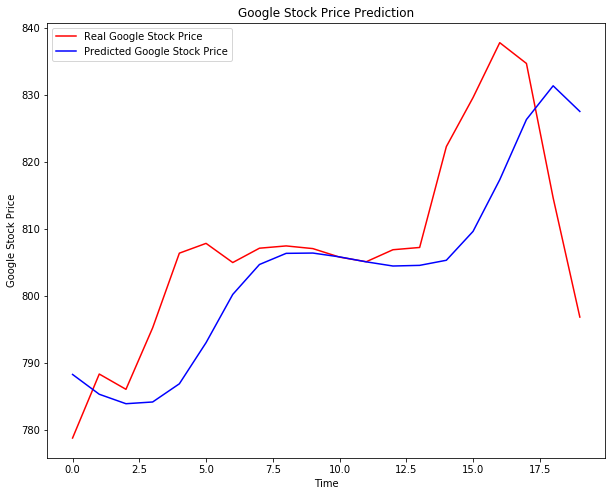

In [35]:
# Visualising the Predictions.

plt.figure(figsize=(10,8))
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

### Model Evaluation.

In [36]:
import math
from sklearn.metrics import mean_squared_error

In [37]:
model_accuracy=math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
model_accuracy

12.777397212610328